<a href="https://colab.research.google.com/github/yuaquintero/DeepLearning/blob/master/U2_11_%5BTALLER%5D_Restricted_Boltzman_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

setting tensorflow version in colab
TensorFlow 2.x selected.


'2.1.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, gzip
from IPython.display import Image
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Exercise 1

Load MNIST and train an RBM. Remember to **normalize** pixel luminosities to the [0-1] interval.

In [7]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
numbers_X =mnist[:,1:785]/255.
numbers_y =mnist[:,0]

print (numbers_X.shape, numbers_y.shape)

(1500, 784) (1500,)


the following code counts the numbers of instances for each digit and a sample of the dataset.

In [6]:
print("TRAIN numbers class distribution")
pd.DataFrame(pd.Series(numbers_y).value_counts()).T

TRAIN numbers class distribution


,2,1,7,6,4,0,9,8,5,3
0,186,157,154,152,151,150,146,141,138,125


In [0]:
def show_linearized_images_sample(X, n_images=200, permutation=True):
    plt.figure(figsize=(18,8))
    Xp = np.random.permutation(X) if permutation else X
    img =  np.rollaxis(np.rollaxis(Xp[:n_images].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.axis("off")

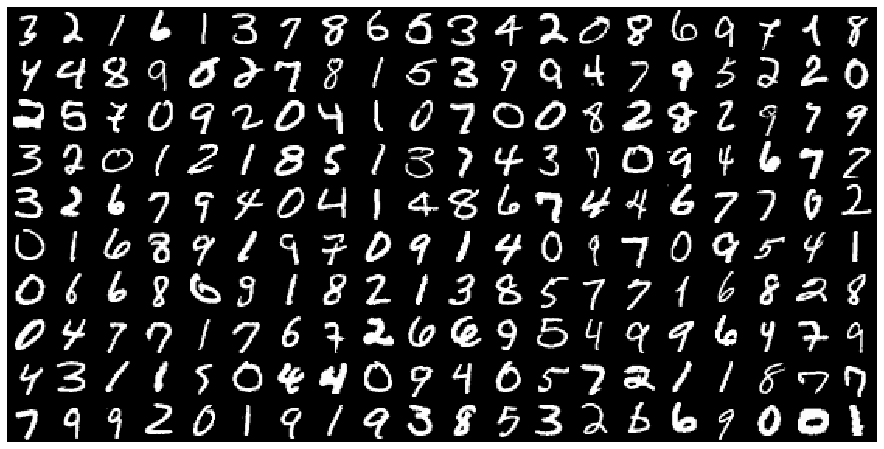

In [9]:
show_linearized_images_sample(numbers_X)


create and train an RBM with 100 components, batch_size 5, learning_rate 0.1 and 100 iterations with `numbers_X`

In [0]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=100, batch_size=5, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(numbers_X);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_


### obtain the `W` matrix and plot the 100 components from the trained RBM (matrix `W`)

you should see something approximately like this


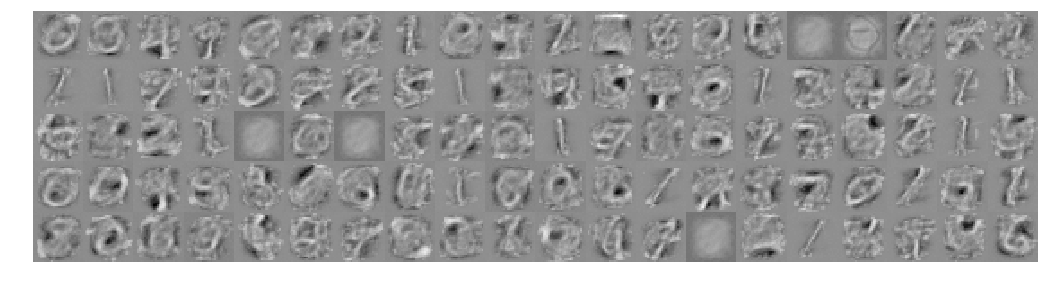

In [0]:
Image(filename='local/imgs/lab_rbm_components.png')

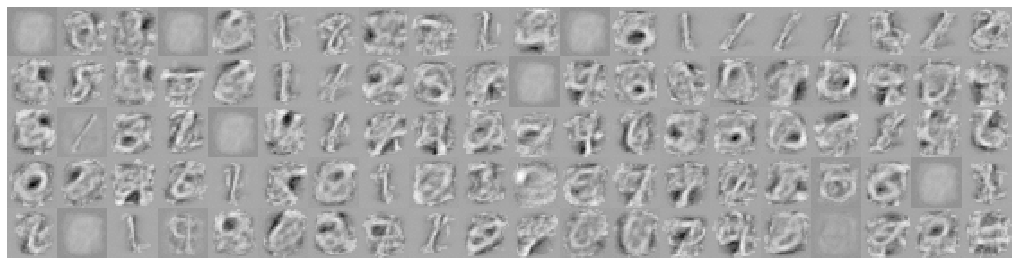

In [11]:
show_linearized_images_sample(W, n_images=len(W))

## Exercise 2

- Load into `fashion_X` 1500 fashion MNIST images and do not forget to normalize their luminosity to the  [0-1] interval.
- Create 1500 random noise images into a variable named `random_imgs` (use `np.random.random(size=(1500,784))`) and set to zero any value under 0.7
- Use the previously trained RBM to compute the free energy of all elements in `fashion_X`, `number_X` , `number_X_sel` and `random_imgs`.
- Plot the histograms. You should see a clear separation of the four datasets.

Your histogram should look roughly like this



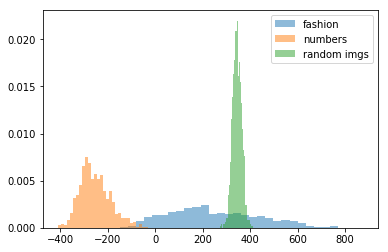

In [0]:
Image(filename='local/imgs/lab_rbm_histograms.png')

In [0]:

fashion_X = ...


In [0]:
random_imgs = ...


In [0]:
plt.hist(...);
plt.hist(...);
plt.hist(...);

plt.legend();

## Exercise 3: 

Select a random set of 40 digits and perform a 100 steps Gibbs sampling for each one of them. 

Follow the example here: https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist

Your generation might look like:



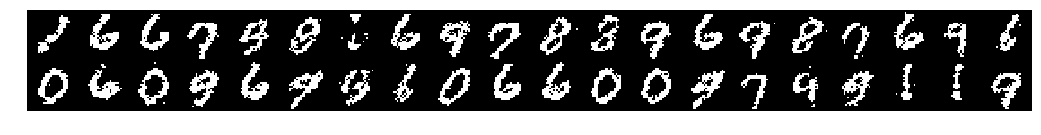

In [0]:
Image(filename='local/imgs/lab_rbm_generated.png')

In [0]:
xx = ... # select 40 digits

In [0]:
for ...
    for ...
        ... # do gibbs sampling

In [0]:
plt.figure(figsize=(10,20))
show_linearized_images_sample(xx, len(xx), permutation=False)

## Exercise 4

Select a simple sklearn classification method (such as GaussianNB or LogisticRegression), make a random train/test split of 50% on MNIST digits and then:

- train and measure the performance of your selected method directly with the raw MNIST data
- train and measure the perofrmance of your selected method **after** transforming MNIST data with the previously trained RBM

you should see some improvement after transforming the data.

In [0]:
from sklearn.model_selection import train_test_split

.. create train/test split ...

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

... create and fit classifier ... 
... measure performace in train and test ...